<a href="https://colab.research.google.com/github/gaurav1030332018/cancerdetection/blob/main/Tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split

In [2]:
pip install keras

In [3]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle dataset"


In [5]:
%cd /content/gdrive/MyDrive/kaggle dataset


/content/gdrive/MyDrive/kaggle dataset


In [7]:
import os
for dirname, _, filenames in os.walk("/content/gdrive/MyDrive/kaggle dataset"):
    for filename in filenames:
        os.path.join(dirname, filename)  

In [8]:
data_dir = (r'/content/gdrive/MyDrive/kaggle dataset/Training')
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))      
        

In [9]:
img_array.shape

(512, 512, 3)

In [10]:
img_size = 128
image_array = cv2.resize(img_array, (img_size,img_size))

In [11]:
gt1 = cv2.imread('/content/gdrive/MyDrive/kaggle dataset/Training/glioma_tumor/gg (1).jpg')
mt1 = cv2.imread('/content/gdrive/MyDrive/kaggle dataset/Training/meningioma_tumor/m (10).jpg')
nt1 = cv2.imread('/content/gdrive/MyDrive/kaggle dataset/Training/no_tumor/1.jpg')
pt1 = cv2.imread('/content/gdrive/MyDrive/kaggle dataset/Training/pituitary_tumor/p (1).jpg')

(-0.5, 511.5, 511.5, -0.5)

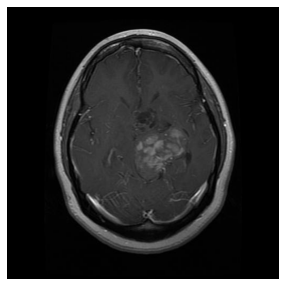

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(gt1)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

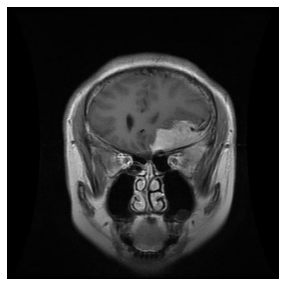

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(mt1)
plt.axis('off')

(-0.5, 349.5, 349.5, -0.5)

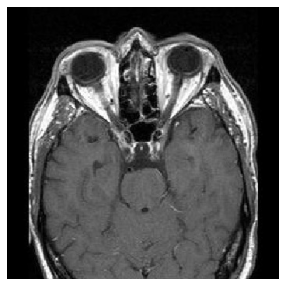

In [14]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(nt1)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

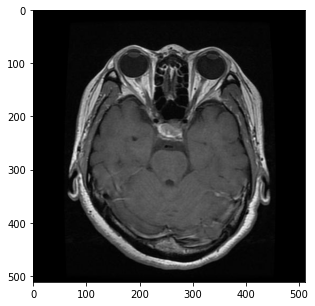

In [15]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(pt1)
plt.axis('on')

In [16]:
train_data = []

for i in categories:
    train_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_data.append([new_image_array , tag])
        except Exception as e:
            pass

In [17]:
X = []
y = []
for i,j in train_data:
    X.append(i)
    y.append(j)
X = np.array(X).reshape(-1,img_size,img_size)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,128,128,1)

(2869, 128, 128)


In [18]:
from keras.utils.np_utils import to_categorical   

y_enc = to_categorical(y, num_classes = 4)

In [19]:
X_train , X_test, y_train, y_test = train_test_split(X , y_enc , test_size = 0.1, random_state = 42)
X_train , X_val, y_train, y_val = train_test_split(X_train , y_train , test_size = 0.1, random_state = 42)

In [20]:
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam

#from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

model = Sequential()


model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 50

es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience = 3
)

batch_size = 16
imggen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
imggen.fit(X_train)
history = model.fit_generator(imggen.flow(X_train,y_train,batch_size = batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              callbacks = [es])    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
145/145 [==============================] - 20s 71ms/step - loss: 1.2076 - accuracy: 0.4426 - val_loss: 1.0185 - val_accuracy: 0.5405
Epoch 2/50
145/145 [==============================] - 9s 59ms/step - loss: 0.8808 - accuracy: 0.6238 - val_loss: 0.8210 - val_accuracy: 0.6486
Epoch 3/50
145/145 [==============================] - 9s 59ms/step - loss: 0.7110 - accuracy: 0.6922 - val_loss: 0.6828 - val_accuracy: 0.6873
Epoch 4/50
145/145 [==============================] - 9s 59ms/step - loss: 0.6847 - accuracy: 0.7187 - val_loss: 0.6012 - val_accuracy: 0.7490
Epoch 5/50
145/145 [==============================] - 9s 60ms/step - loss: 0.5836 - accuracy: 0.7603 - val_loss: 0.6926 - val_accuracy: 0.6950
Epoch 6/50
145/145 [==============================] - 9s 60ms/step - loss: 0.5055 - accuracy: 0.7893 - val_loss: 0.5311 - val_accuracy: 0.7683
Epoch 7/50
145/145 [==============================] - 9s 60ms/step - loss: 0.4853 - accuracy: 0.8015 - val_loss: 0.6026 - val_accuracy: 0.752

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0

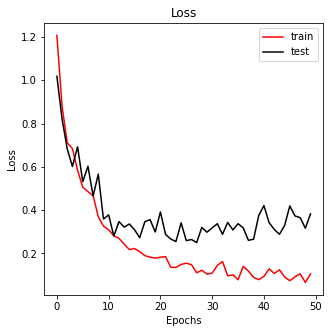

In [23]:
plt.plot(history.history["loss"],c = "red")
plt.plot(history.history["val_loss"],c = "black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

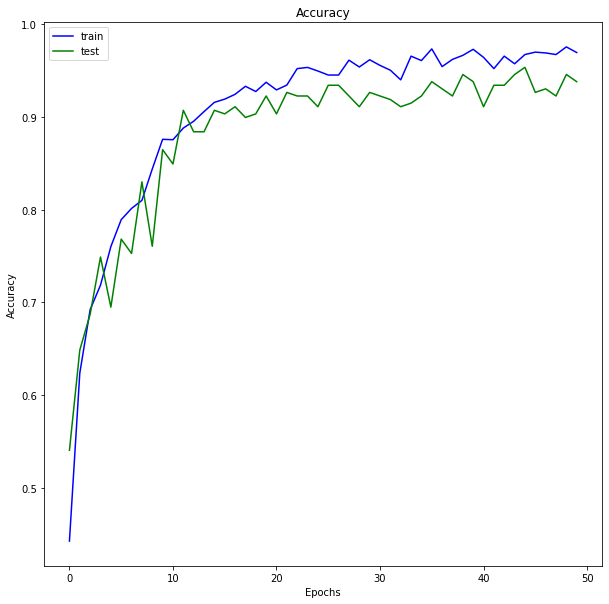

In [24]:
plt.plot(history.history["accuracy"],c = "blue")
plt.plot(history.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (50,50)
plt.legend(["train", "test"])

In [25]:
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]

0.9268292784690857

In [29]:
import pickle
pickle.dump(model, open('trcnn.sav', 'wb'))


INFO:tensorflow:Assets written to: ram://cb86baa0-da09-43d4-9b0f-ece0e44c84cb/assets


In [30]:
score = model.evaluate(X_test, y_test, verbose = 0)
score[1]

0.9268292784690857

TESTING

In [31]:
data_dir = (r'/content/gdrive/MyDrive/kaggle dataset/Testing')
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
test_data = []

for i in categories:
    test_path = os.path.join(data_dir,i)
    tag = categories.index(i)
    for img in os.listdir(test_path):
        try:
            image_arr = cv2.imread(os.path.join(test_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (128,128))
            test_data.append([new_image_array , tag])
        except Exception as e:
            pass

In [ ]:
len(test_data)

394

In [ ]:
xx = []
yy = []
for i,j in test_data:
    xx.append(i)
    yy.append(j)
xx = np.array(xx).reshape(-1,128,128)
print(xx.shape)
xx = xx/255.0  
xx = xx.reshape(-1,128,128,1)

(394, 128, 128)


In [ ]:
#ynew = model.predict(xx)
predictions = (model.predict(xx) > 0.5).astype("int32")

In [ ]:
print(predictions)

[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


TAKE SINGLE IMAGE


In [35]:
file="/content/gdrive/MyDrive/kaggle dataset/Training/glioma_tumor/gg (100).jpg"
image_arr = cv2.imread(file, cv2.IMREAD_GRAYSCALE) 
new_image = cv2.resize(image_arr, (128,128))
new_image = np.array(new_image).reshape(-1,128,128,1)
print(new_image.shape)
new_image = new_image/255.0  
# xx = xx.reshape(-1,128,128,1)

(1, 128, 128, 1)


In [36]:
p = (model.predict(new_image) > 0.5).astype("int32")

In [37]:
print(p)

[[1 0 0 0]]


In [ ]:
yy = to_categorical(yy, num_classes = 4)
score = model.evaluate(xx, yy, verbose = 0)
score[1]

0.7182741165161133

(-0.5, 127.5, 127.5, -0.5)

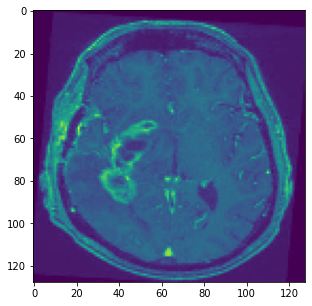

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(cv2.resize(image_arr, (128,128)))
plt.axis('on')